# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = sorted(np.random.randint(1,441,3))
indices = [100,423, 433]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys())#.reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,11594,7779,12144,3252,8035,3029
423,17565,3686,4657,1059,1803,668
433,1982,3218,1493,1541,356,1449


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
- Customer 100: average value for fresh, and above 75 percentile for other categories:  hotels or markets
- Customer 423: above 75 percentile for fresh, and under average for others: deli, meat market
- Customer 433: average for delicatessen and under average for others: cafe, delicatessen shop


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split   
from sklearn.tree import DecisionTreeRegressor
r_sq = []
for name in list(data.columns):
    new_data=data.drop(name, axis=1)
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[name], test_size = .25, random_state=7)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)
    r_sq.append(regressor.score(X_test,y_test))

    # TODO: Report the score of the prediction using the testing set
print pd.DataFrame({'Feature':data.columns, 'R_squared':r_sq})

            Feature  R_squared
0             Fresh  -0.542285
1              Milk  -2.345370
2           Grocery   0.548489
3            Frozen  -1.378187
4  Detergents_Paper   0.584354
5      Delicatessen  -3.351854


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?


**Answer:**
I attempted to look at all the available features. The model fails to predict `Fresh`, `Milk`, `Frozen`, and `Delicatessen`. Their score is negative. This is a strong case to argue that they are important features.
`Grocery` and `Detergents_Paper` are more predictable with R^2 above .5 and below .75. 
It is likely that one of `Grocery` and `Detergents_Paper` is not necessary to identify customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

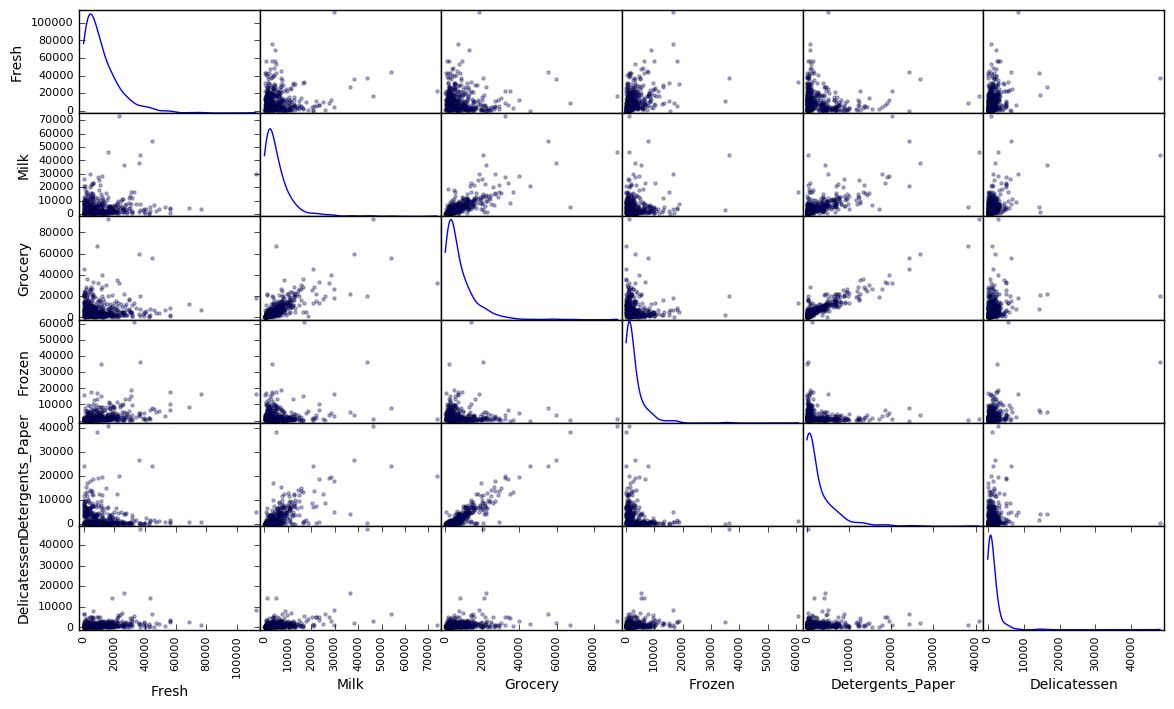

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?


**Answer:**
- All of the features are more or less skewed to the right, which means that there are a lot of outliers with large values. This is foreseen comparing means and medians in Data Explorarion section. In fact, there are 5-10% are outliers in each features. All features have minimum greater than 0.

In [6]:
iqr = data.quantile([.25,.75])
outlier_percen = {}
for name in data.columns:
    outlier_percen[name] = sum(data[name] > (2.5*iqr[name][.75]-1.5*iqr[name][.25]))/1./data.shape[0]
print outlier_percen    

{'Grocery': 0.054545454545454543, 'Frozen': 0.097727272727272732, 'Delicatessen': 0.061363636363636363, 'Detergents_Paper': 0.068181818181818177, 'Fresh': 0.045454545454545456, 'Milk': 0.06363636363636363}


- `Grocery` and `Detergents_Paper` seem to be highly correlated; this might explain why the R^2 to predict either of these features are positive. They also seem to correlate with `Milk` though the correlation seems to be weaker. This makes me suspect the relevance of `Grocery` as it correlations with `Detergents_Paper` and `Milk` are the two highest correlations.
Other feature pairs don't seem to be highly correlated.

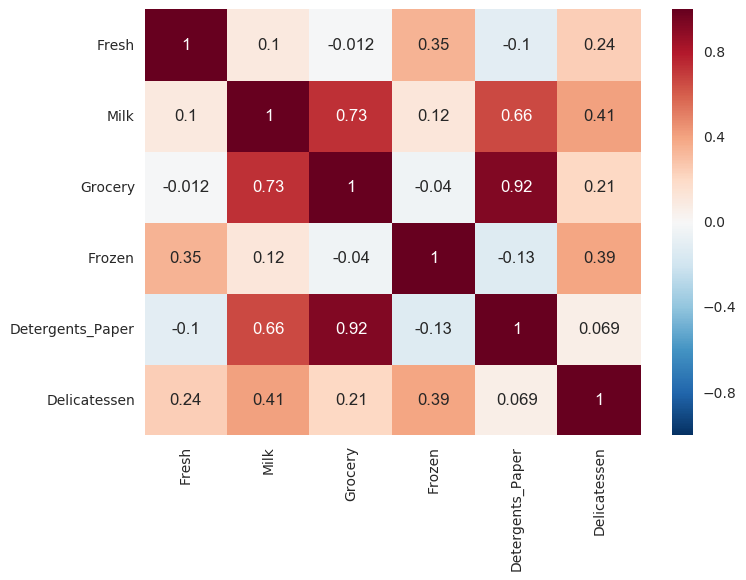

In [7]:
from seaborn import heatmap
heatmap(data.corr(),annot=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. A simple approach which can work in most cases would be applying the natural logarithm.



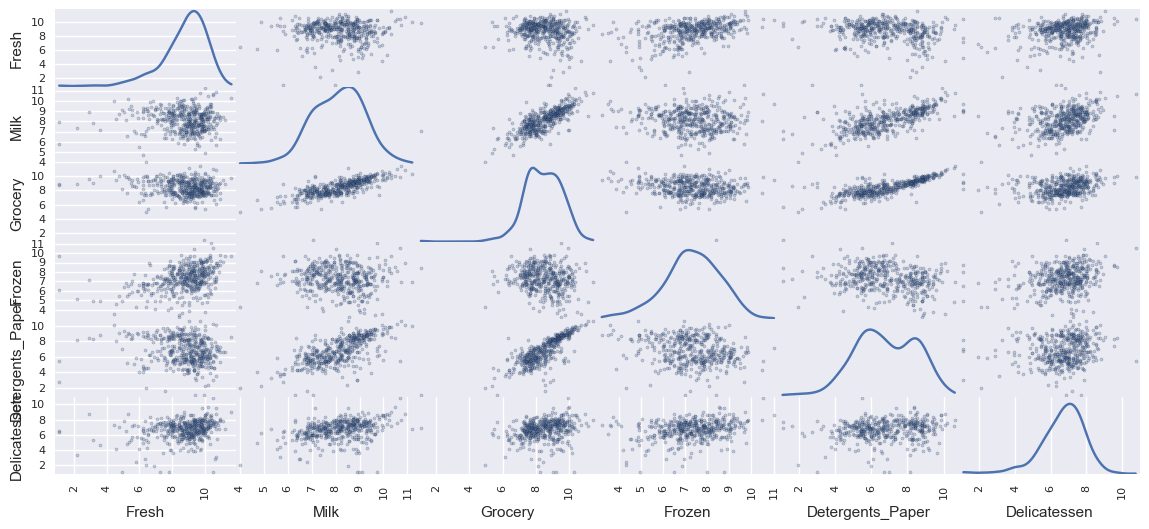

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,6), diagonal = 'kde');

Since taking the logarithm shifts the distribution's skewness from to the right to to the left for every feature, I also attempted other types of data transformation and settle down on powering to the .2th.

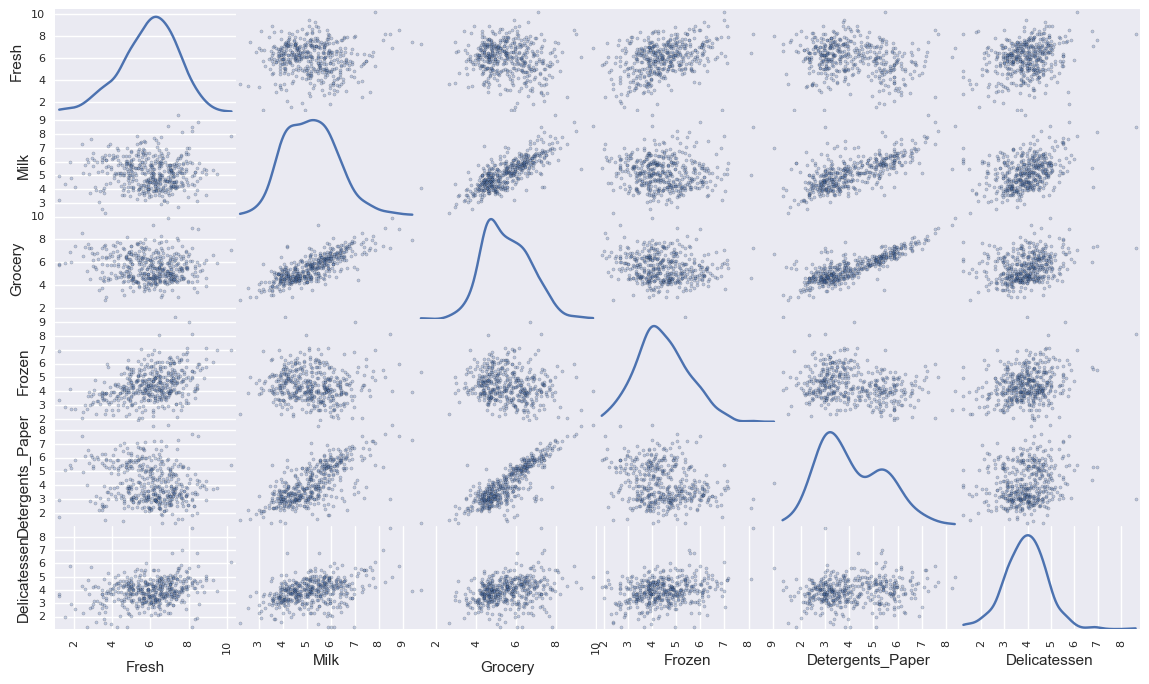

In [9]:
rt_data = np.power(data,.2)
pd.scatter_matrix(rt_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After transforming data, the correlation among features changes but not significantly.


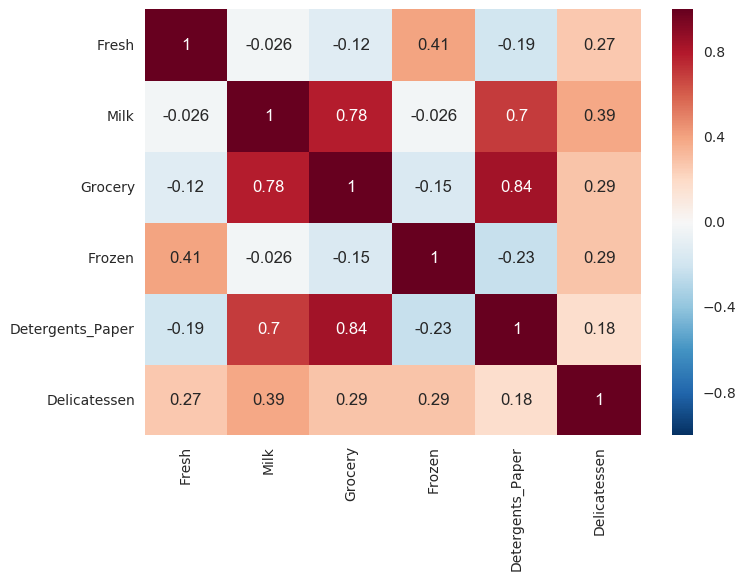

In [10]:
heatmap(rt_data.corr(),annot=True)

In [13]:
# Display the log-transformed sample data
rt_samples = np.power(samples,.2)
display(rt_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
100,6.499002,6.000463,6.559524,5.039995,6.039447,4.968895
423,7.062031,5.167864,5.415284,4.026977,4.479186,3.672445
433,4.564789,5.029412,4.313323,4.340708,3.238098,4.287594


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). 

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
use_data = rt_data.copy()
from collections import Counter
cnt = Counter()
for feature in use_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = use_data[feature].quantile(.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = use_data[feature].quantile(.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_index = [i for i in xrange(len(use_data)) if ~((use_data[feature][i] >= Q1 - step) & 
                                                          (use_data[feature][i] <= Q3 + step))]
    display(use_data.iloc[outlier_index])
    for i in outlier_index:
        cnt[i]+=1

print [i for i in cnt if cnt[i]>1]    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = cnt.keys()
#print outliers
# Remove the outliers, if any were specified
good_data = use_data.drop(use_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,1.551846,4.336757,5.943546,2.809361,5.105236,1.933182
95,1.245731,4.932608,5.743859,3.378240,2.948906,3.716458
96,1.872171,4.825336,6.051873,2.705662,5.219536,2.932864
181,10.232002,7.840388,7.108300,6.994828,5.481330,6.114954
218,1.782602,5.957425,6.861156,4.185821,5.447459,5.765741
338,1.245731,3.195132,5.878680,6.896528,1.718772,3.532422


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,8.503655,8.849003,8.891390,6.000926,7.527641,5.782474
85,6.941556,8.568854,9.851239,4.001561,8.359677,4.940689
86,7.448381,9.402755,7.967808,3.970667,7.252863,3.900655
183,8.189934,8.483826,7.260076,8.175973,2.990058,8.632668


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
61,8.149303,8.256502,9.016673,5.040615,7.679015,4.580798
75,7.276416,4.084624,1.245731,5.355853,1.245731,3.960964
85,6.941556,8.568854,9.851239,4.001561,8.359677,4.940689
333,6.117098,5.488401,9.238478,2.651272,8.244979,4.139189


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
93,6.467303,4.988749,4.601058,8.106548,2.345588,4.855214
183,8.189934,8.483826,7.260076,8.175973,2.990058,8.632668
325,7.997508,6.998083,6.712336,9.054808,4.177317,5.620528


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,7.660055,8.170999,7.388555,5.526229,5.338729,6.976182
71,7.119467,4.173369,7.321792,5.572414,5.297728,6.793690
87,8.457214,5.498285,6.051724,5.754842,4.361907,6.782291
109,4.261839,6.993491,7.806164,3.677926,3.840973,1.245731
128,2.686740,6.156859,5.205721,2.694373,4.029256,1.245731
142,8.198319,5.900455,6.071869,4.957690,1.820564,1.245731
154,3.620413,2.228807,2.675125,2.371441,1.475773,1.515717
183,8.189934,8.483826,7.260076,8.175973,2.990058,8.632668
187,4.757806,6.034478,6.286566,5.746980,5.102583,1.245731
233,3.951986,5.489283,5.059678,3.929596,3.329237,1.475773


[183, 85]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- There are several data points considered outliers for multiple features: For example, 183 has extreme values for 3 categories:`Milk`,`Frozen`, and `Delicatessen`. Especially in feature `Delicatessen`, its value is far higher than other outliers. 85 also has extreme values for `Grocery` and `Milk`. 
- I will remove all of the outliers and will predict these points using the clustering model trained by normal values to see if it makes sense.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

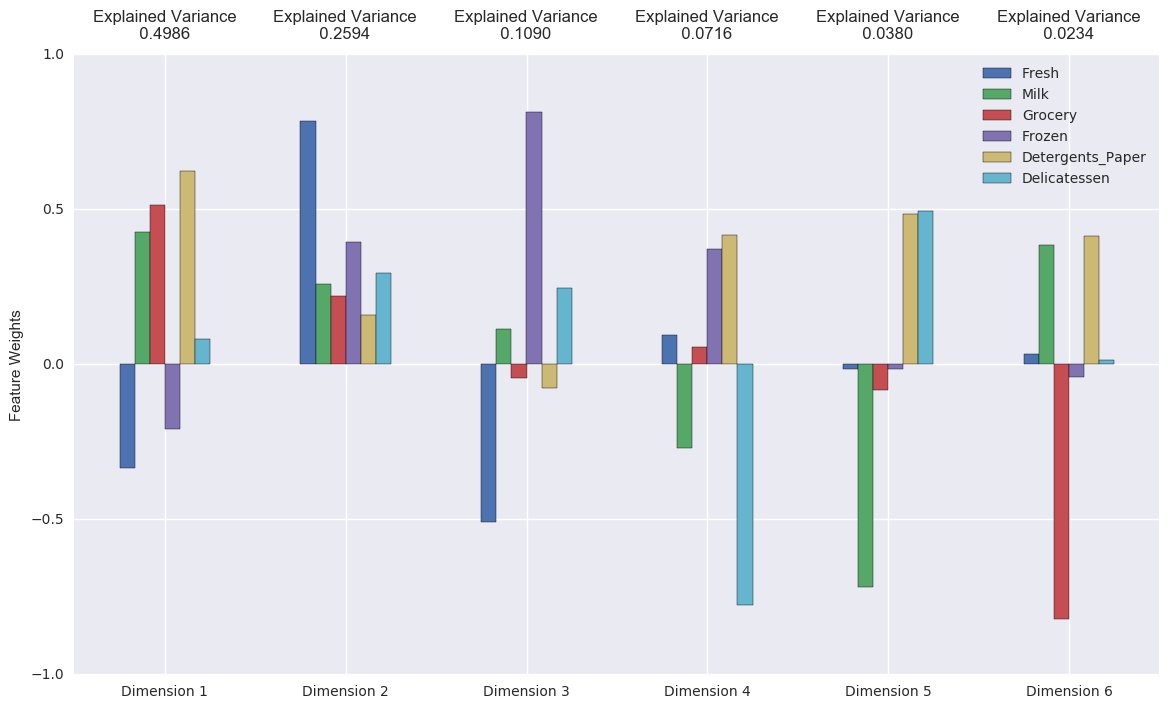

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)
# TODO: Transform bc_samples using the PCA fit above
pca_samples = pca.transform(rt_samples)
pca_outlier = pca.transform(rt_data.iloc[outliers])

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.


**Answer:**
- The first 2 principle components explain 75.8% variance in the data. The first 4 explain 94.86% variance in the data.
- The first component explains nearly of the variance. `Milk`,`Grocery`, and `Detergents_Paper` are well represented in this component. Customers who has a high absolute value of this component tends to have a strong inverse spending pattern between `Detergents_Paper`, household needs, and `Fresh`, food ingredients.
    + The second component is a good representation of the other features, explaining why together the first 2 explain over 3 quarters of variance in the data. Customer with high value of this component tends to be purchase more of everything. This may best represent the amount of spending.
    + The third component provides a good representation for `Frozen` and `Fresh`. The cumulative variance explained at this point is 86.7%. We also see a drastic inverse relationship between `Frozen` and `Fresh` here. Customers who have high value for this component are more likely to be cafes.
    + `Delicatessen` is well represented in the fourth component. The cumulative variance explained at this point is nearly 95%, a pretty good representation of the variance in the data. Customers who have high absolute values for this components tend to have strong inverse spending between `Milk` and `Delicatessen` versus other products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9194,1.7440,0.4041,0.0905,0.7462,0.2643
1,-0.0807,0.6923,-0.9506,0.2879,0.0532,0.2822
2,-0.6587,-1.4413,0.8507,-0.8476,-0.0209,0.5290


It consistent with what I expected in terms of the sign.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.


In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(rt_samples)
pca_outlier = pca.transform(rt_data.iloc[outliers])

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])#,'Dimension 3','Dimension 4','Dimension 5'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9194,1.7440
1,-0.0807,0.6923
2,-0.6587,-1.4413


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

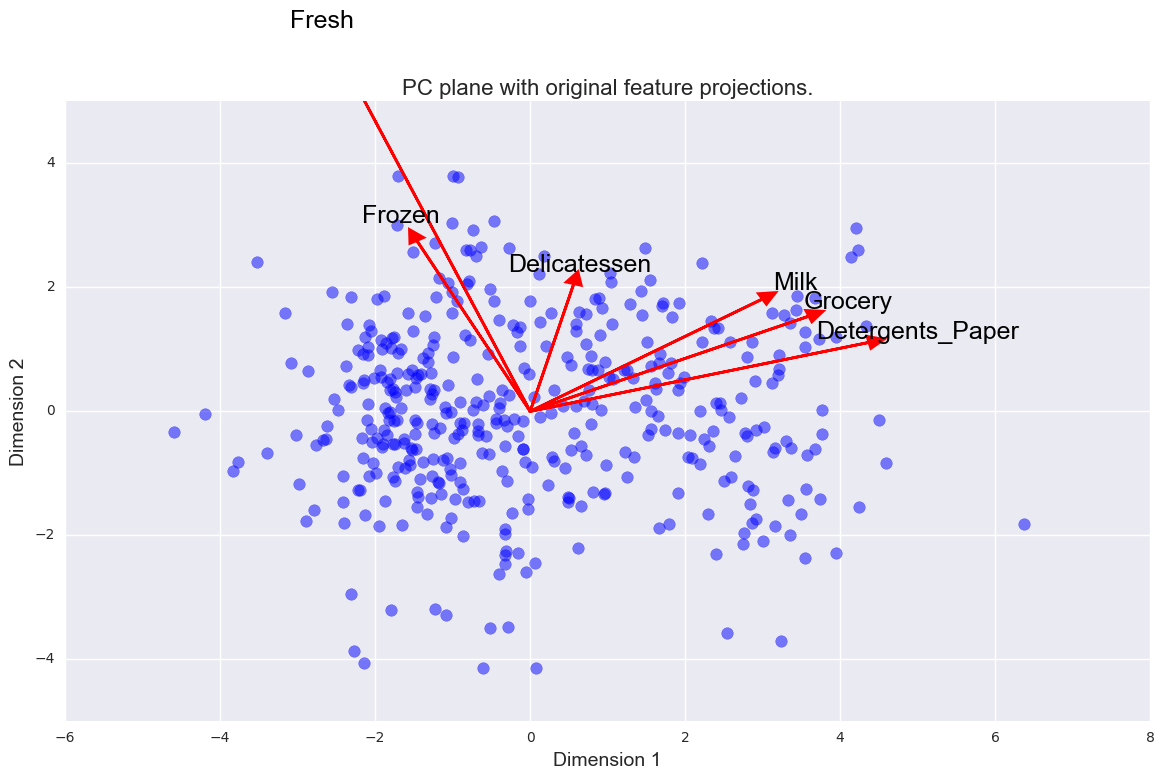

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation



Consistent with the pca_results plot earlier, this plot shows that `Milk`,`Grocery`, and `Detergents_Paper`are strongly correlated with the first principle and the others the second.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


**Answer:**

*K-Means clustering:*
- Good when the underlied structure consists of tight, spherical-shaped, equally-sized clusters
- Can find a local optimum relatively fast compared to Gaussian Mixture Model: the order of complexity is linear with the number of samples
- Less prone to overfit than Mixture Model

*Gaussian Mixture Model:*
- More flexible to capture different shape of clusters (does not hold assumption on size, variance, etc.)
- Soft clustering - assign probability a data point belongs to each cluster instead of assigningone cluster to a single data point.
- The fastest mixture model

I will choose Gaussian Mixture Model. Firstly, I think a probability-oriented model is more suitable as a wholesale customer can be a hybrid of different types (clusters) rather than definitively of one cluster.  Secondly, I don't have much prior knowledge about the clusters and Gaussian Mixture Model will reveal clusters without forcing them to be the same shape. Thirdly, this is a small dataset so complexity is not a concern. Lastly, since we use a very small number of features, there is few room for overfitting.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
for i in xrange(17,1,-1):
    clusterer = GMM(n_components=i,random_state=7)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    outlier_preds = clusterer.predict(pca_outlier)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print i,score

17 0.134323751556
16 0.13733169013
15 0.154206059552
14 0.186882758231
13 0.187827701953
12 0.196072225469
11 0.160512712459
10 0.224170443002
9 0.253035416684
8 0.26722338418
7 0.231659308018
6 0.255466633075
5 0.323949316162
4 0.313413826749
3 0.351250604754
2 0.438564599663


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
2 has the best silhoulette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

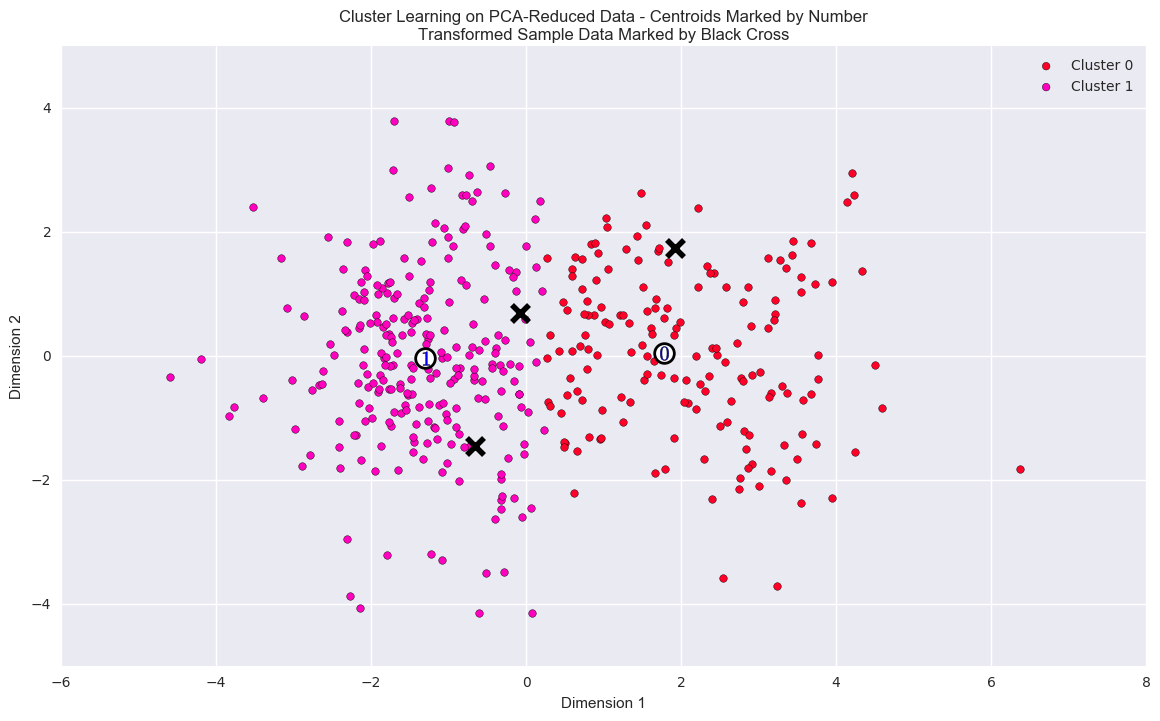

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. 



In [21]:
# TODO: Inverse transform the centers
true_centers= np.power(pca.inverse_transform(centers),5)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers,columns=data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4632.111932,7234.796398,10820.808307,1106.034669,3825.185535,1100.797933
Segment 1,10572.031921,2001.348786,2572.791755,2231.637076,373.225923,778.443754


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
With respect to the medians, Segment 0 represents wholesale customers who buy more milk, grocery, detergents and paper, and delicatessen products and less fresh and frozen products. Segment 0 could represent those make food such as hotels, cafes, restaurants, vendors, etc. Meanwhile, Segment 1 represents the other end of the spectrum. Segment 1 could represent markets or retailers.

Segment centers compared to dataset's medians


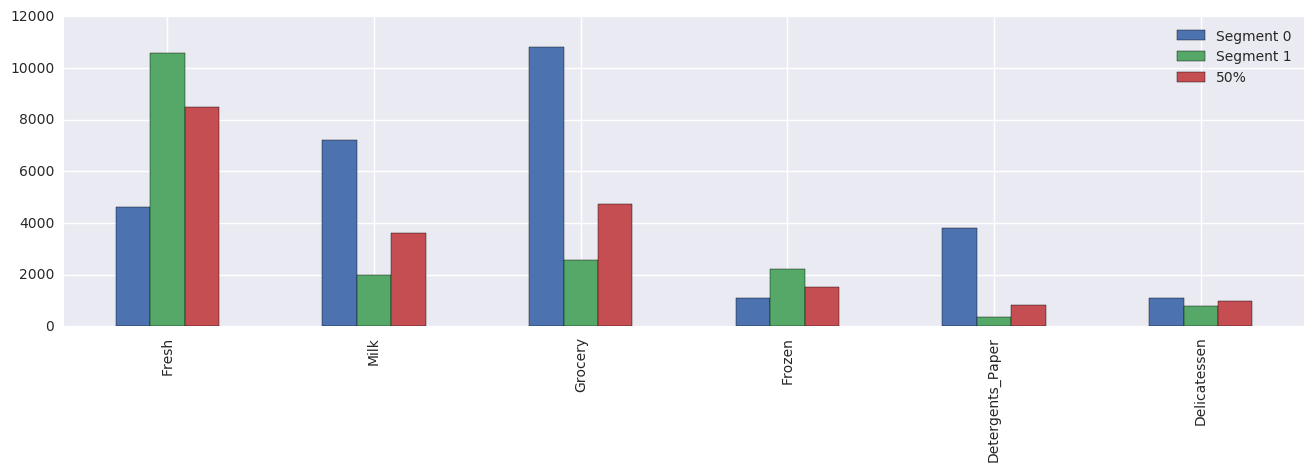

In [25]:
test = true_centers.append(data.describe().ix['50%'])
print "Segment centers compared to dataset's medians"
test.transpose().plot(kind = 'bar', figsize = (16, 4))

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", [100,423,433][i], "predicted to be in Cluster", pred
print samples

print "Cluster 0:", [outliers[i] for i in xrange(len(outlier_preds)) if outlier_preds[i]==0]
print "Cluster 1:", [outliers[i] for i in xrange(len(outlier_preds)) if outlier_preds[i]==1]

Sample point 100 predicted to be in Cluster 0
Sample point 423 predicted to be in Cluster 1
Sample point 433 predicted to be in Cluster 1
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
100  11594  7779    12144    3252              8035          3029
423  17565  3686     4657    1059              1803           668
433   1982  3218     1493    1541               356          1449
Cluster 0: [128, 23, 47, 181, 187, 61, 66, 71, 333, 85, 86, 218, 95, 96, 109]
Cluster 1: [142, 154, 183, 325, 75, 338, 87, 93, 233]


**Answer:**
Sample point 100 spends more on all categories so I would say it's more likely to be in Segment 0. The prediction is consistent.
Sample point 423 spends more on fresh and average or below average for others so I would say it's more likely to be in Segment 1 and the prediction also agrees.
Sample point 433 spends less on all categories except for `Frozen` and `Delicatessen`, in which the spending is about the average. So I would predict Segment 1 and so does the clustering model.

Predictions for the outliers are also consistent with the model. Sample points that have extreme values for `Fresh` and `Frozen` usually fall into Cluster 1 and the rest usually Cluster 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*



**Answer:**
We can look at the turnover rate, the return rate, complaints, or order metrics of positive feedback seperately for each cluster and test if it is significantly positive (one of the tests we can use is the t-test).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?


**Answer:**
They could run a model to predict customer segment using the original data and feed the estimated product spending to predict the customer segment for those new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

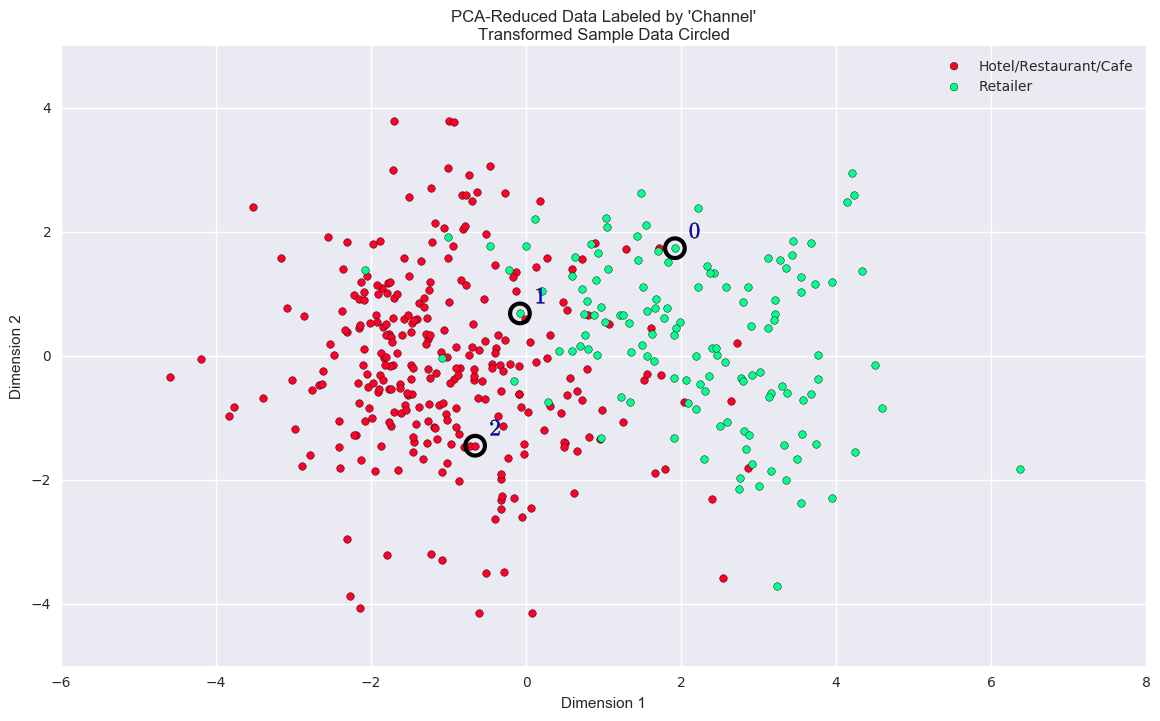

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- The clustering algorithm detected 2 clusters that look very similar to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. Customer Segment 0 represents retailers well while Segment 1 represents hotels/restaurants/cafes
- I would consider these classifications as consistent with my previously defined customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.